In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Load the dataset
df=pd.read_csv('202201-divvy-tripdata.csv')
print(df)

                 ride_id  rideable_type           started_at  \
0       C2F7DD78E82EC875  electric_bike  2022-01-13 11:59:47   
1       A6CF8980A652D272  electric_bike  2022-01-10 08:41:56   
2       BD0F91DFF741C66D   classic_bike  2022-01-25 04:53:40   
3       CBB80ED419105406   classic_bike  2022-01-04 00:18:04   
4       DDC963BFDDA51EEA   classic_bike  2022-01-20 01:31:10   
...                  ...            ...                  ...   
103765  8788DA3EDE8FD8AB  electric_bike  2022-01-18 12:36:48   
103766  C6C3B64FDC827D8C  electric_bike  2022-01-27 11:00:06   
103767  CA281AE7D8B06F5A  electric_bike  2022-01-10 16:14:51   
103768  44E348991862319B  electric_bike  2022-01-19 13:22:11   
103769  E477C594A182AE58  electric_bike  2022-01-13 17:24:43   

                   ended_at             start_station_name start_station_id  \
0       2022-01-13 12:02:44       Glenwood Ave & Touhy Ave              525   
1       2022-01-10 08:46:17       Glenwood Ave & Touhy Ave              5

In [14]:
# Display the first few rows of the dataset to understand its structure
print(df.head())


            ride_id  rideable_type           started_at             ended_at  \
0  C2F7DD78E82EC875  electric_bike  2022-01-13 11:59:47  2022-01-13 12:02:44   
1  A6CF8980A652D272  electric_bike  2022-01-10 08:41:56  2022-01-10 08:46:17   
2  BD0F91DFF741C66D   classic_bike  2022-01-25 04:53:40  2022-01-25 04:58:01   
3  CBB80ED419105406   classic_bike  2022-01-04 00:18:04  2022-01-04 00:33:00   
4  DDC963BFDDA51EEA   classic_bike  2022-01-20 01:31:10  2022-01-20 01:37:12   

              start_station_name start_station_id  \
0       Glenwood Ave & Touhy Ave              525   
1       Glenwood Ave & Touhy Ave              525   
2  Sheffield Ave & Fullerton Ave     TA1306000016   
3       Clark St & Bryn Mawr Ave     KA1504000151   
4    Michigan Ave & Jackson Blvd     TA1309000002   

                end_station_name end_station_id  start_lat  start_lng  \
0           Clark St & Touhy Ave         RP-007  42.012800 -87.665906   
1           Clark St & Touhy Ave         RP-007  42.01

In [17]:
# Convert start_time and end_time to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [18]:
# Create new columns for day of the week, hour of the day, and trip duration
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour_of_day'] = df['started_at'].dt.hour
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  

In [19]:
# Basic Statistics
print(df.describe())


           start_lat      start_lng        end_lat        end_lng  \
count  103770.000000  103770.000000  103684.000000  103684.000000   
mean       41.896850     -87.648622      41.896950     -87.648964   
std         0.049664       0.053199       0.048400       0.031342   
min        41.650000     -87.830000      41.648501     -87.830000   
25%        41.879255     -87.664169      41.879344     -87.664358   
50%        41.894877     -87.644098      41.895501     -87.644098   
75%        41.925602     -87.629912      41.925602     -87.629912   
max        45.635034     -73.796477      42.070000     -87.520000   

         hour_of_day  trip_duration  
count  103770.000000  103770.000000  
mean       13.606717      15.264664  
std         4.876102     178.218038  
min         0.000000       0.000000  
25%        10.000000       4.833333  
50%        14.000000       7.866667  
75%        17.000000      13.533333  
max        23.000000   29271.100000  


In [20]:
# Data Cleaning (e.g., removing trips with negative duration or extremely long trips)
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 120)] 

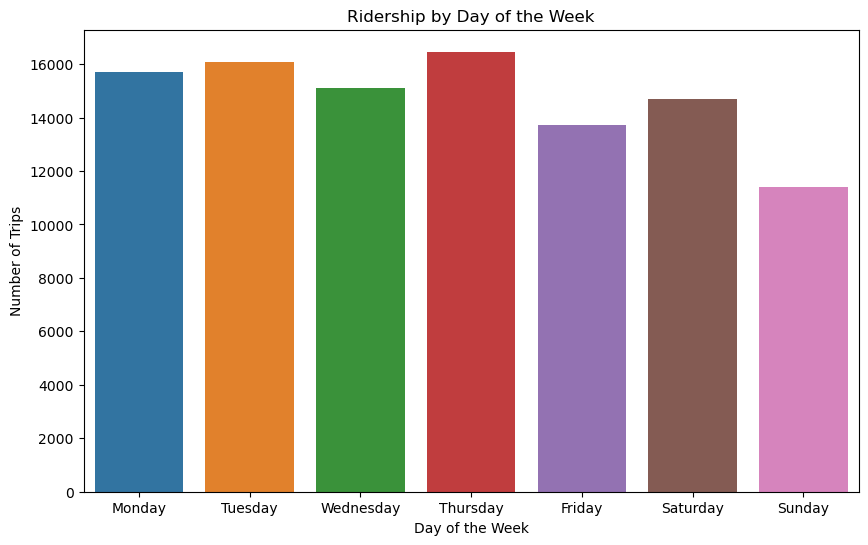

In [21]:
# Analysis: Ridership by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ridership by Day of the Week')
plt.ylabel('Number of Trips')
plt.xlabel('Day of the Week')
plt.show()

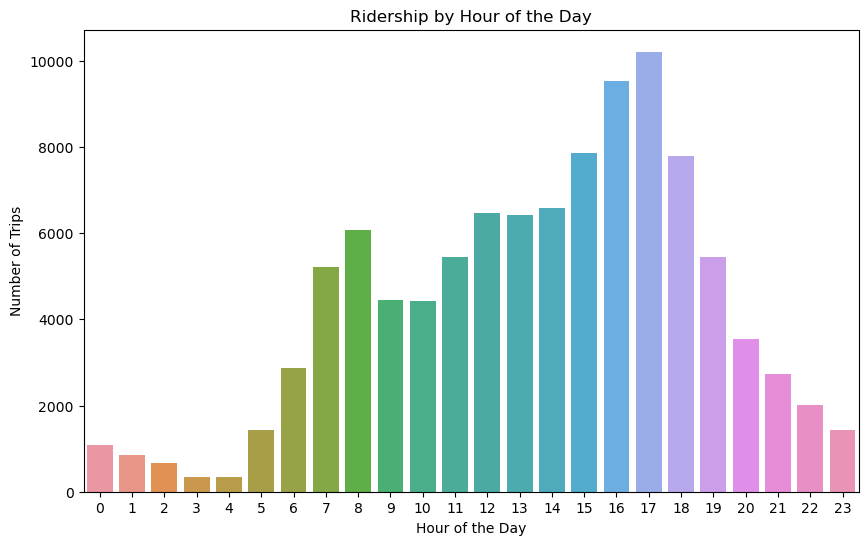

In [22]:
# Analysis: Ridership by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour_of_day')
plt.title('Ridership by Hour of the Day')
plt.ylabel('Number of Trips')
plt.xlabel('Hour of the Day')
plt.show()

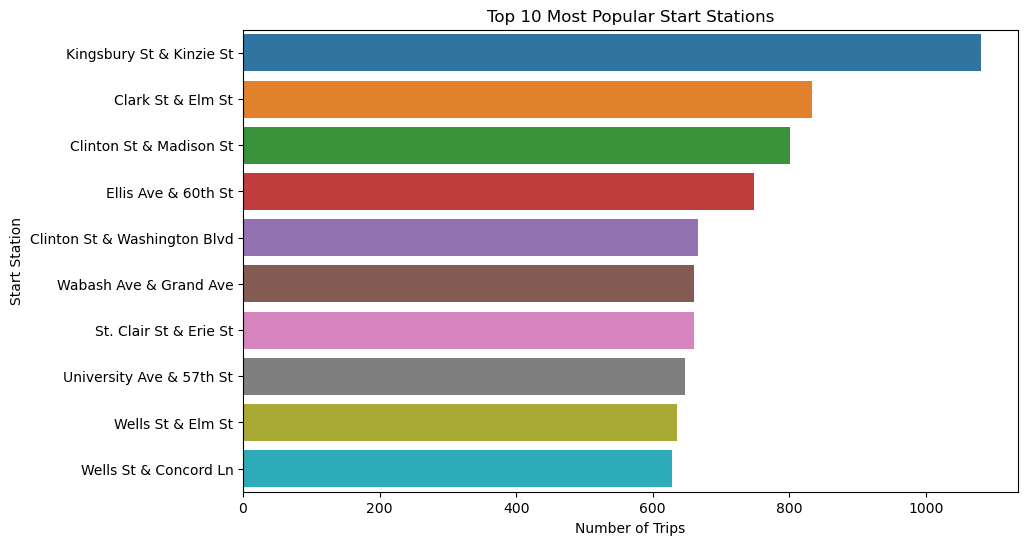

In [24]:
# Analysis: Most Popular Start Stations
top_start_stations = df['start_station_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_start_stations.values, y=top_start_stations.index)
plt.title('Top 10 Most Popular Start Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')
plt.show()

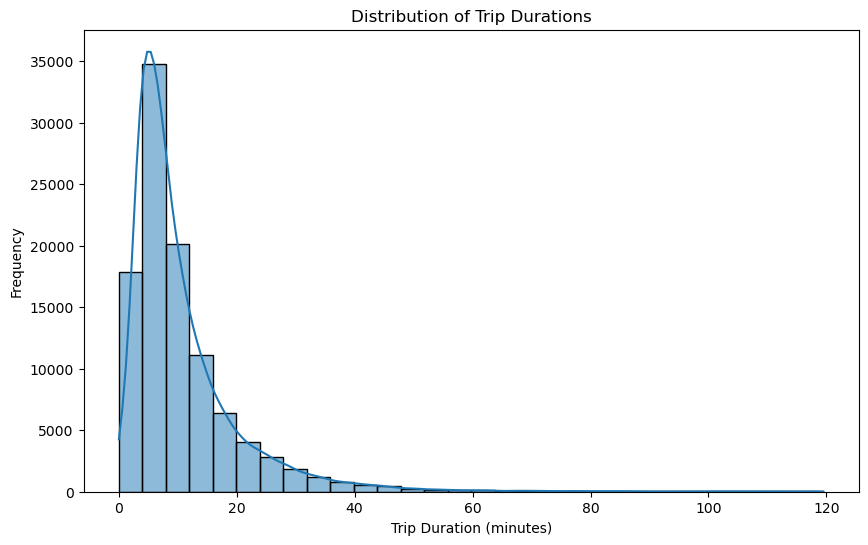

In [25]:
# Analysis: Trip Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

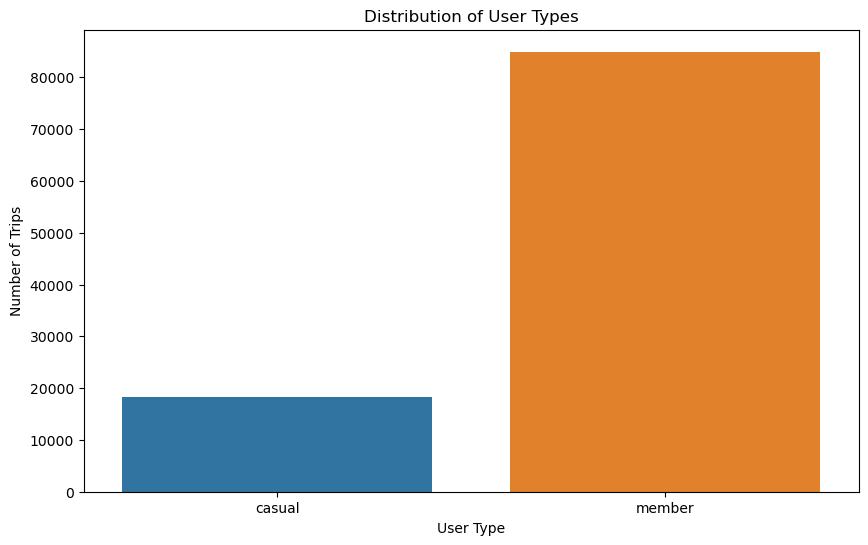

In [27]:
# Analysis: User Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='member_casual')
plt.title('Distribution of User Types')
plt.ylabel('Number of Trips')
plt.xlabel('User Type')
plt.show()

In [28]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_bike_sharing_data.csv', index=False)